# **1. Project Designing**

# **2. Data Mining**

# **3. Data Preprocessing**

In [341]:
# Line Wrapping in Collaboratory Google results
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

**1. Data Cleaning:**
Check for missing values, outliers, and inconsistencies in the dataset and handle them appropriately. Missing values can be imputed or dropped based on the extent of missingness and their impact on the analysis.

In [342]:
# Import Libraries for analysis and visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

In [343]:
# To import datetime library
from datetime import datetime
import datetime as dt

# Library of warnings would assist in ignoring warnings issued
import warnings
warnings.filterwarnings('ignore')

# Import necessary statistical libraries
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import norm

In [344]:
# Import libraries for ML-Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.linear_model import  LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import  BaggingRegressor, ExtraTreesRegressor, RandomForestRegressor,StackingRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
import lightgbm
from lightgbm import LGBMRegressor
# Libraries for save the model
import pickle

In [345]:
# Mount Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [346]:
# Load the dataset
file_path = '/content/drive/MyDrive/Machine Learning Project/electricity_consumption_data.csv'

df = pd.read_csv(file_path)

In [347]:
# Display the shape of the data
df.shape

(1467, 15)

In [348]:
# Display the first few rows to understand the data
print(df.head())

     RY                      ToU                                   U  \
0  2015       Municipal Electric                              Auburn   
1  2015  Investor Owned Electric  Interstate Power and Light Company   
2  2015  Investor Owned Electric          MidAmerican Energy Company   
3  2015  Investor Owned Electric       Amana Society Service Company   
4  2015       Municipal Electric                          Bloomfield   

         ORoRS       ORoCIS        ORoSR      ORoAOS      ASforR      ASforCI  \
0     232546.0          0.0          0.0     12494.0     1646.39         0.00   
1  521115322.0  846803408.0   74454294.0  11626180.0  3661188.00  10691600.00   
2  535517779.0  792025980.0  158876153.0  96997319.0  5490294.00  14032377.00   
3     894691.0    6971861.0          0.0     76411.0     7095.91     84452.11   
4    1647288.0    1503769.0          0.0     86996.0    11501.42     14118.17   

     ASforSR     ASforAO   ANoCR  ANoCCI  ANoCSR  ANoCAO  
0        0.0      103

In [349]:
df.head(5)

,RY,ToU,U,ORoRS,ORoCIS,ORoSR,ORoAOS,ASforR,ASforCI,ASforSR,ASforAO,ANoCR,ANoCCI,ANoCSR,ANoCAO
0,2015,Municipal Electric,Auburn,232546.0,0.0,0.0,12494.0,1646.39,0.00,0.0,103.25,175,0,0.0,10
1,2015,Investor Owned Electric,Interstate Power and Light Company,521115322.0,846803408.0,74454294.0,11626180.0,3661188.00,10691600.00,1779026.0,53530.00,408969,78348,6.0,1040
2,2015,Investor Owned Electric,MidAmerican Energy Company,535517779.0,792025980.0,158876153.0,96997319.0,5490294.00,14032377.00,7907806.0,1399758.00,568142,81892,5.0,12764
3,2015,Investor Owned Electric,Amana Society Service Company,894691.0,6971861.0,0.0,76411.0,7095.91,84452.11,0.0,853.85,714,302,0.0,24
4,2015,Municipal Electric,Bloomfield,1647288.0,1503769.0,0.0,86996.0,11501.42,14118.17,0.0,1328.69,1123,268,0.0,1


In [350]:
df.iloc[745 : 751]

,RY,ToU,U,ORoRS,ORoCIS,ORoSR,ORoAOS,ASforR,ASforCI,ASforSR,ASforAO,ANoCR,ANoCCI,ANoCSR,ANoCAO
745,2019,Municipal Electric,Cascade,846082.0,773424.0,0.0,216231.0,7694.0,8566.0,0.0,2281.0,949,162,0.0,32
746,2019,Municipal Electric,Cedar Falls,16139447.0,18557187.0,7804705.0,3410151.0,170532.0,259510.0,318313.0,55319.0,17128,2251,NaN,146
747,2019,Municipal Electric,Coon Rapids,753173.0,433337.0,819096.0,282901.0,7272.0,3735.0,10971.0,3153.0,606,139,1.0,45
748,2019,Municipal Electric,Corning,799057.0,466112.0,0.0,567172.0,8467.0,4685.0,0.0,6218.0,745,218,0.0,60
749,2019,Municipal Electric,Graettinger,465112.0,366380.0,296337.0,18748.0,5056.0,4233.0,0.0,201.0,415,90,0.0,12
750,2019,Municipal Electric,Harlan,3036282.0,2952865.0,233785.0,363609.0,24161.0,30765.0,9188.0,4042.0,2305,472,NaN,84


In [351]:
df.tail(5)

,RY,ToU,U,ORoRS,ORoCIS,ORoSR,ORoAOS,ASforR,ASforCI,ASforSR,ASforAO,ANoCR,ANoCCI,ANoCSR,ANoCAO
1462,2022,Distribution Cooperative,T. I. P. Rural Electric Cooperative,10635839.00,5744518.00,0.00,113722.00,83301.0,65148.0,0.0,41.0,6160,334,0.0,41
1463,2022,Distribution Cooperative,The Calhoun County Electric Coop. Assn.,4435962.89,799995.49,519366.76,17749.09,31460.0,6956.0,6268.0,0.0,1671,24,2.0,0
1464,2022,Distribution Cooperative,"United Electric Cooperative, Inc.",1021956.00,111639.00,0.00,0.00,6548.0,930.0,0.0,0.0,435,18,0.0,0
1465,2022,Distribution Cooperative,Western Iowa Power Cooperative,9256408.00,4986241.00,0.00,129131.00,67410.0,37252.0,0.0,601.0,3930,1605,0.0,43
1466,2022,Distribution Cooperative,Woodbury County Rural Electric Cooperative,8264596.00,2162619.00,0.00,19479.00,57468.0,19886.0,0.0,24.0,3307,113,0.0,5


In [352]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1467 entries, 0 to 1466
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RY       1467 non-null   int64  
 1   ToU      1467 non-null   object 
 2   U        1467 non-null   object 
 3   ORoRS    1467 non-null   float64
 4   ORoCIS   1467 non-null   float64
 5   ORoSR    1467 non-null   float64
 6   ORoAOS   1467 non-null   float64
 7   ASforR   1467 non-null   float64
 8   ASforCI  1467 non-null   float64
 9   ASforSR  1467 non-null   float64
 10  ASforAO  1467 non-null   float64
 11  ANoCR    1467 non-null   int64  
 12  ANoCCI   1467 non-null   int64  
 13  ANoCSR   1452 non-null   float64
 14  ANoCAO   1467 non-null   int64  
dtypes: float64(9), int64(4), object(2)
memory usage: 172.0+ KB


In [353]:
# Determine the datatype of Each Column
df.dtypes

RY           int64
ToU         object
U           object
ORoRS      float64
ORoCIS     float64
ORoSR      float64
ORoAOS     float64
ASforR     float64
ASforCI    float64
ASforSR    float64
ASforAO    float64
ANoCR        int64
ANoCCI       int64
ANoCSR     float64
ANoCAO       int64
dtype: object

In [354]:
# Get a statistical summary to check for outliers
print(df.describe())

                RY         ORoRS        ORoCIS         ORoSR        ORoAOS  \
count  1467.000000  1.467000e+03  1.467000e+03  1.467000e+03  1.467000e+03   
mean   2018.476483  9.714942e+06  1.404701e+07  3.042812e+06  9.077429e+05   
std       2.292097  6.231676e+07  1.036788e+08  2.496384e+07  8.412189e+06   
min    2015.000000  0.000000e+00  0.000000e+00 -4.205410e+05 -4.003299e+06   
25%    2016.000000  4.169225e+05  2.219630e+05  0.000000e+00  1.498581e+04   
50%    2018.000000  9.132270e+05  6.962770e+05  0.000000e+00  6.812389e+04   
75%    2020.000000  3.095575e+06  3.372182e+06  0.000000e+00  2.033665e+05   
max    2022.000000  6.924891e+08  1.313607e+09  5.470338e+08  1.821175e+08   

             ASforR       ASforCI       ASforSR       ASforAO          ANoCR  \
count  1.467000e+03  1.467000e+03  1.467000e+03  1.467000e+03    1467.000000   
mean   7.834463e+04  1.868676e+05  9.624706e+04  1.006353e+04    7564.516019   
std    5.082949e+05  1.447104e+06  9.128795e+05  1.033581

In [355]:
# Get duplicates count for each unique row
dup_Count =  len(df)-len(df.drop_duplicates())

In [356]:
# There is no duplicate values in the dataframe
dup_count1 = df[df.duplicated()].shape
dup_count1

(0, 15)

In [357]:
# Find the missing values of each column
null_values = df.isnull().sum()

<Figure size 1000x1000 with 0 Axes>

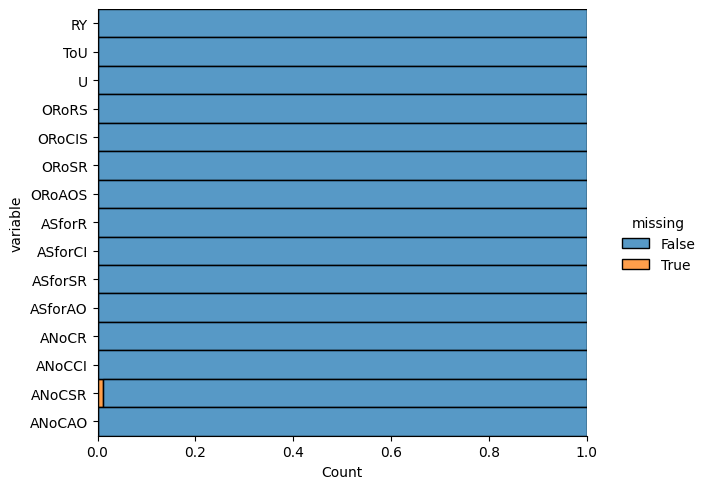

In [358]:
# Visualizing the missing values
plt.figure(figsize=(10,10))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

In [359]:
# Remove all rows with missing data
data = df.dropna()
data.isna().sum()

RY         0
ToU        0
U          0
ORoRS      0
ORoCIS     0
ORoSR      0
ORoAOS     0
ASforR     0
ASforCI    0
ASforSR    0
ASforAO    0
ANoCR      0
ANoCCI     0
ANoCSR     0
ANoCAO     0
dtype: int64

# **4. Dataset Information**

RY - Reporting Year

ToU - Type of Utility

U - Utility

ORoRS - Operating Revenues of Residential Sales

ORoCIS - Operating Revenues of Commercial & Industrial Sales

ORoSR - Operating Revenues of Sales for Resale

ORoAOS - Operating Revenues of All Other Sales

ASforR - Amount Sold for Residential in MWh

ASforCI - Amount Sold for Commercial & Industrial in MWh

ASforSR - Amount Sold for Sales for Resale in MWh

ASforAO - Amount Sold for All Other in MWh

ANoCR - Average No. of Customers in Residential

ANoCCI - Average No. of Customers in Commercial & Industrial

ANoCSR - Average No. of Customers in Sales for Resale

ANoCAO - Average No. of Customers in All Other

In [360]:
# Show all columns
df.columns

Index(['RY', 'ToU', 'U', 'ORoRS', 'ORoCIS', 'ORoSR', 'ORoAOS', 'ASforR',
       'ASforCI', 'ASforSR', 'ASforAO', 'ANoCR', 'ANoCCI', 'ANoCSR', 'ANoCAO'],
      dtype='object')

In [361]:
df_energy = df.copy()

In [362]:
# Convert to DataFrame
df_energy = pd.DataFrame(data)

# Apply One-Hot Encoding
df_energy = pd.get_dummies(df_energy, columns=['ToU', 'U'])

print("DataFrame after One-Hot Encoding:")
print(df_energy)

DataFrame after One-Hot Encoding:
        RY         ORoRS        ORoCIS         ORoSR       ORoAOS      ASforR  \
0     2015  2.325460e+05  0.000000e+00  0.000000e+00     12494.00     1646.39   
1     2015  5.211153e+08  8.468034e+08  7.445429e+07  11626180.00  3661188.00   
2     2015  5.355178e+08  7.920260e+08  1.588762e+08  96997319.00  5490294.00   
3     2015  8.946910e+05  6.971861e+06  0.000000e+00     76411.00     7095.91   
4     2015  1.647288e+06  1.503769e+06  0.000000e+00     86996.00    11501.42   
...    ...           ...           ...           ...          ...         ...   
1462  2022  1.063584e+07  5.744518e+06  0.000000e+00    113722.00    83301.00   
1463  2022  4.435963e+06  7.999955e+05  5.193668e+05     17749.09    31460.00   
1464  2022  1.021956e+06  1.116390e+05  0.000000e+00         0.00     6548.00   
1465  2022  9.256408e+06  4.986241e+06  0.000000e+00    129131.00    67410.00   
1466  2022  8.264596e+06  2.162619e+06  0.000000e+00     19479.00    57468.

In [363]:
# Rename the columns
df_rename = df.copy()
df_rename.rename(columns={'RY': 'reporting_year', 'ToU':'utility_type', 'U':'utility', 'ORoRS ': 'residential_revenues', 'ORoCIS':'commercial_revenues',
       'ORoSR':'resale_revenues', 'ORoAOS':'other_revenues', 'ASforR ':'residential_sales', 'ASforCI':'commercial_sales', 'ASforSR':'resale_sales', 'ASforAO':'other_sales'
       ,'ANoCR':'residential_customers', 'ANoCCI':'commercial_customers', 'ANoCSR':'resale_customers', 'ANoCAO':'other_customers'},inplace = True)

In [364]:
df_rename.columns

Index(['reporting_year', 'utility_type', 'utility', 'ORoRS',
       'commercial_revenues', 'resale_revenues', 'other_revenues', 'ASforR',
       'commercial_sales', 'resale_sales', 'other_sales',
       'residential_customers', 'commercial_customers', 'resale_customers',
       'other_customers'],
      dtype='object')

In [365]:
# Check Unique Values for each variable
def get_unqiuevalues(df1):
    unique_values=df1.apply(pd.Series.unique)
    return unique_values

unq_values = get_unqiuevalues(df)

for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique())

No. of unique values in  RY is 8
No. of unique values in  ToU is 5
No. of unique values in  U is 221
No. of unique values in  ORoRS is 1446
No. of unique values in  ORoCIS is 1422
No. of unique values in  ORoSR is 302
No. of unique values in  ORoAOS is 1251
No. of unique values in  ASforR is 1398
No. of unique values in  ASforCI is 1378
No. of unique values in  ASforSR is 289
No. of unique values in  ASforAO is 1006
No. of unique values in  ANoCR is 987
No. of unique values in  ANoCCI is 569
No. of unique values in  ANoCSR is 14
No. of unique values in  ANoCAO is 166


In [366]:
# Separate columns in list for better analysis
gen_cols=['reporting_year', 'utility_type', 'utility']
rev_cols=['residential_revenues', 'commercial_revenues', 'resale_revenues', 'other_revenues']
sal_cols=['residential_sales', 'commercial_sales', 'resale_sales', 'other_sales']
cus_cols=['residential_customers', 'commercial_customers', 'resale_customers','other_customers']

# random_col = ["rv1","rv2"]

# **5. Data Vizualization**

<Axes: xlabel='ORoCIS', ylabel='Density'>

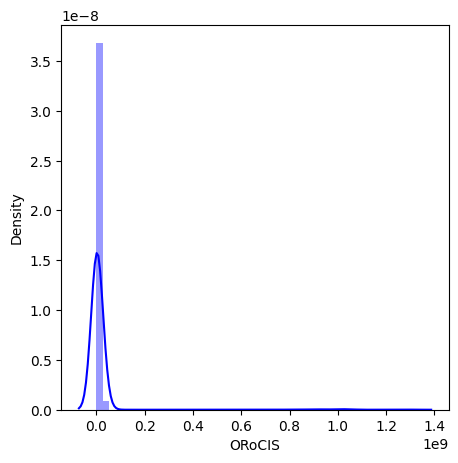

In [367]:
# Chart - 01 visualization
# Dependent varaible "ORoCIS - commercial_revenues"
plt.figure(figsize=(5,5))
sns.distplot(df_energy['ORoCIS'], color = 'Blue')

<Axes: xlabel='ASforR', ylabel='Density'>

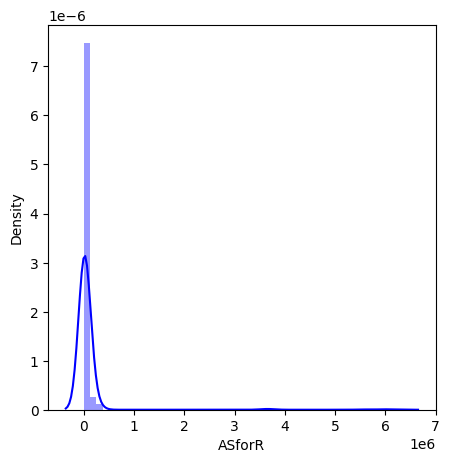

In [368]:
# Chart - 02 visualization
# Dependent varaible "ASforR - residential_sales"
plt.figure(figsize=(5,5))
sns.distplot(df_energy['ASforR'], color = 'Blue')

<Axes: xlabel='ANoCCI', ylabel='Density'>

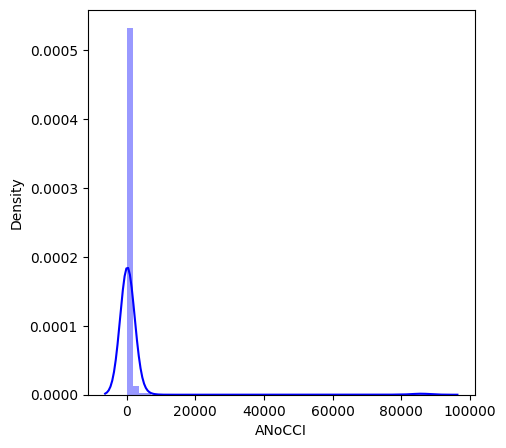

In [369]:
# Chart - 03 visualization
# Dependent varaible "ANoCCI - commercial_customers"
plt.figure(figsize=(5,5))
sns.distplot(df_energy['ANoCCI'], color = 'Blue')

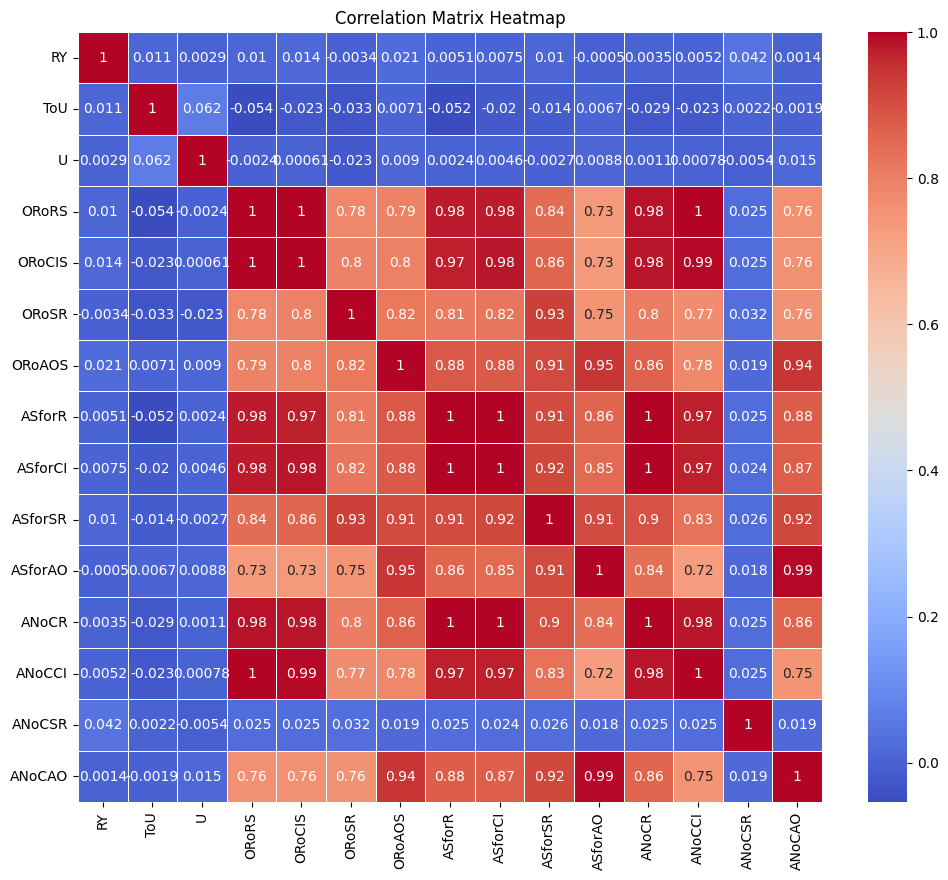

In [370]:
# Display the heatmap
data['ToU'] = data['ToU'].astype('category').cat.codes
data['U'] = data['U'].astype('category').cat.codes

correlation_matrix = data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Matrix Heatmap')
plt.show()

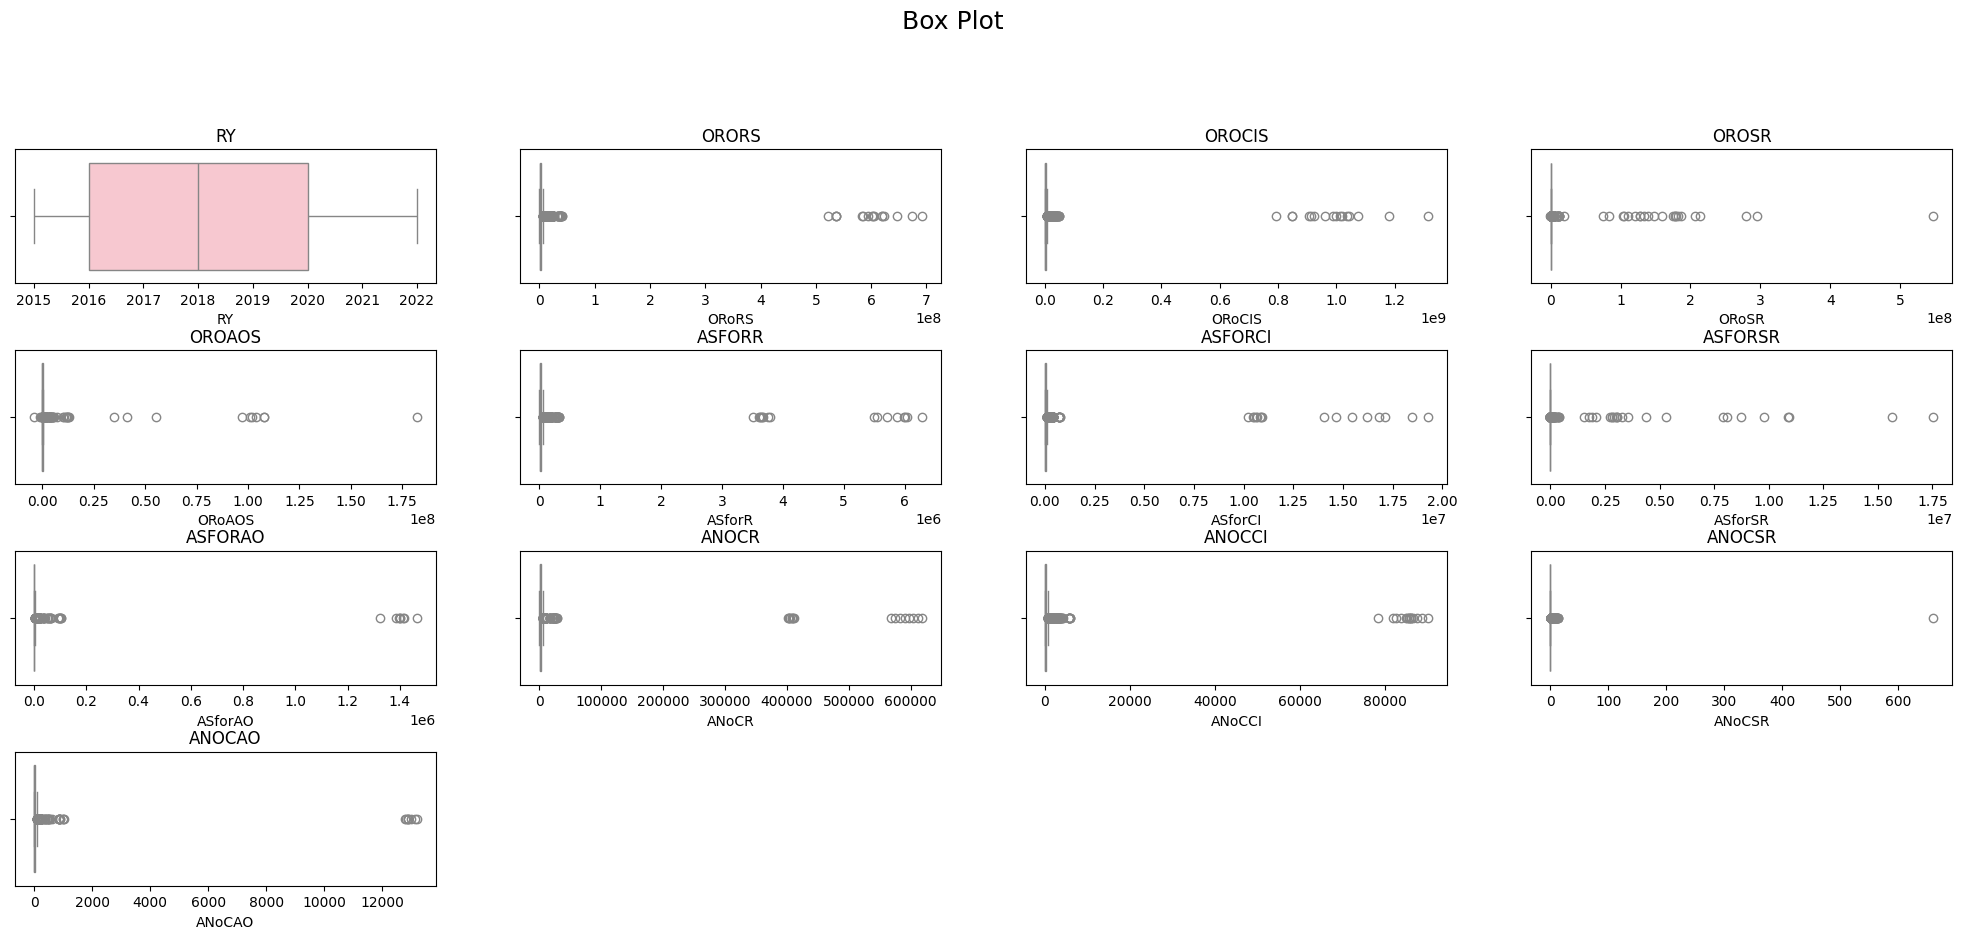

In [371]:
# Handling outliers & outlier treatments
df = df_energy.copy()
col_list = list(df.describe().columns)

# Find the outliers using boxplot
plt.figure(figsize=(25, 20))
plt.suptitle("Box Plot", fontsize=18, y=0.95)

for n, ticker in enumerate(col_list):

    ax = plt.subplot(8, 4, n + 1)

    plt.subplots_adjust(hspace=0.5, wspace=0.2)

    sns.boxplot(x=df[ticker],color='pink', ax = ax)

    ax.set_title(ticker.upper())

# **6. Feature Selection**

In [372]:
# Feature Selection using PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df_energy = pd.DataFrame(data)

df_energy = pd.get_dummies(df_energy, columns=['ToU', 'U'])

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_energy)

# Set the number of principal components
pca = PCA(n_components=5)
principal_components = pca.fit_transform(scaled_features)

pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])

print("PCA result:")
print(pca_df)

print("Explained variance ratio by each principal component:")
print(pca.explained_variance_ratio_)

PCA result:
            PC1       PC2       PC3        PC4       PC5
0     -0.497903 -0.959140  0.126038   0.045567  0.232547
1     19.175408  1.011905 -3.275456  14.979971  0.330654
2     35.553614 -1.415841  0.037838  -8.119675  1.067415
3      1.813676  1.161620 -0.897960   4.797911  1.714846
4     -0.451013 -0.969614  0.157375  -0.098216  0.191478
...         ...       ...       ...        ...       ...
1447  -0.159398  3.026384 -0.604920  -0.400982 -0.648281
1448  -0.293829  3.014297 -0.686437  -0.208415 -1.635389
1449  -0.347228  3.022708 -0.570796  -0.338092 -0.672146
1450  -0.151183  3.023808 -0.525865  -0.517804 -0.375595
1451  -0.246829  3.026308 -0.583995  -0.416369 -0.850272

[1452 rows x 5 columns]
Explained variance ratio by each principal component:
[0.04797756 0.01228519 0.00899782 0.00770949 0.00584813]


In [373]:
# Convert to DataFrame
df_energy = pd.DataFrame(data)

# Convert categorical variables to numerical using One-Hot Encoding
df_energy = pd.get_dummies(df_energy, columns=['ToU', 'U'])

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_energy)

# Apply PCA
pca = PCA(n_components=5)  # Set the number of principal components
principal_components = pca.fit_transform(scaled_features)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])

# Select PC1 as the feature
X = pca_df[['PC1']]

# Assuming ORoRS as the dependent variable for regression
y = df_energy['ORoRS']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("Shapes of the datasets:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

Shapes of the datasets:
X_train: (1161, 1)
X_test: (291, 1)
y_train: (1161,)
y_test: (291,)


# **7. Model Selection**

In [374]:
# Select PC1 as the feature
X = pca_df[['PC1']]

# Assuming ORoRS as the dependent variable for regression
y = df_energy['ORoRS']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Linear Regression Model Evaluation:
Mean Squared Error (MSE): 231588746668595.53
R-squared (R2): 0.9067015721627917


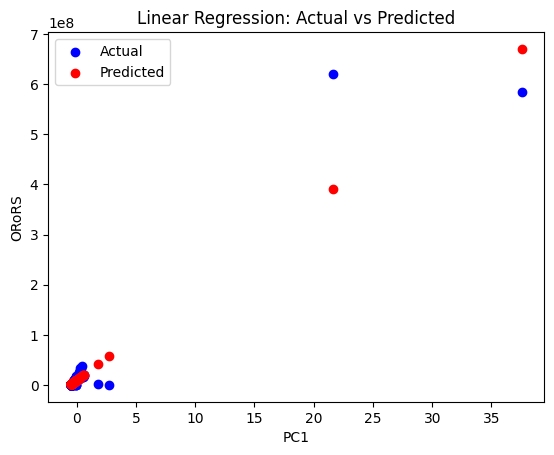

In [375]:
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the Linear Regression model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = linear_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# Plotting the results
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('PC1')
plt.ylabel('ORoRS')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()
plt.show()

In [376]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Split the dataset into training and testing sets
X_train_lasso, X_test_lasso, y_train_lasso, y_test_lasso = train_test_split(
    pca_df, df_energy['ORoRS'], test_size=0.2, random_state=42
)

# Initialize and train the Lasso Regression model
lasso_regressor = Lasso()
parameters = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}  # Define a grid of hyperparameters
lasso_grid = GridSearchCV(lasso_regressor, parameters, cv=5)
lasso_grid.fit(X_train_lasso, y_train_lasso)

# Select the best hyperparameters
best_alpha = lasso_grid.best_params_['alpha']

# Initialize Lasso Regression with the best alpha
lasso_regressor = Lasso(alpha=best_alpha)
lasso_regressor.fit(X_train_lasso, y_train_lasso)

# Predict on the test set
y_pred_lasso = lasso_regressor.predict(X_test_lasso)

# Evaluate the model
mse_lasso = mean_squared_error(y_test_lasso, y_pred_lasso)
r2_lasso = r2_score(y_test_lasso, y_pred_lasso)

print("Lasso Regression Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse_lasso}")
print(f"R-squared (R2): {r2_lasso}")

Lasso Regression Model Evaluation:
Mean Squared Error (MSE): 51533067222820.96
R-squared (R2): 0.9792392582857293


In [377]:
from sklearn.linear_model import Ridge

# Split the dataset into training and testing sets
X_train_ridge, X_test_ridge, y_train_ridge, y_test_ridge = train_test_split(
    pca_df, df_energy['ORoRS'], test_size=0.2, random_state=42
)

# Initialize and train the Ridge Regression model
ridge_regressor = Ridge()
parameters = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}  # Define a grid of hyperparameters
ridge_grid = GridSearchCV(ridge_regressor, parameters, cv=5)
ridge_grid.fit(X_train_ridge, y_train_ridge)

# Select the best hyperparameters
best_alpha_ridge = ridge_grid.best_params_['alpha']

# Initialize Ridge Regression with the best alpha
ridge_regressor = Ridge(alpha=best_alpha_ridge)
ridge_regressor.fit(X_train_ridge, y_train_ridge)

# Predict on the test set
y_pred_ridge = ridge_regressor.predict(X_test_ridge)

# Evaluate the model
mse_ridge = mean_squared_error(y_test_ridge, y_pred_ridge)
r2_ridge = r2_score(y_test_ridge, y_pred_ridge)

print("Ridge Regression Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse_ridge}")
print(f"R-squared (R2): {r2_ridge}")

Ridge Regression Model Evaluation:
Mean Squared Error (MSE): 53088457440871.24
R-squared (R2): 0.9786126498511446


In [378]:
from sklearn.linear_model import LogisticRegression

# Assuming ORoRS as the dependent variable for logistic regression
y_logistic = (df_energy['ORoRS'] > df_energy['ORoRS'].mean()).astype(int)  # Convert to binary for logistic regression

# Split the dataset into training and testing sets
X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = train_test_split(
    pca_df, y_logistic, test_size=0.2, random_state=42
)

# Initialize and train the Logistic Regression model
logistic_regressor = LogisticRegression(random_state=42)
logistic_regressor.fit(X_train_logistic, y_train_logistic)

# Predict on the test set
y_pred_logistic = logistic_regressor.predict(X_test_logistic)

# Evaluate the model
accuracy = logistic_regressor.score(X_test_logistic, y_test_logistic)

print("Logistic Regression Model Evaluation:")
print(f"Accuracy: {accuracy}")

# Note: Logistic regression does not have MSE or R-squared as evaluation metrics

Logistic Regression Model Evaluation:
Accuracy: 0.9587628865979382


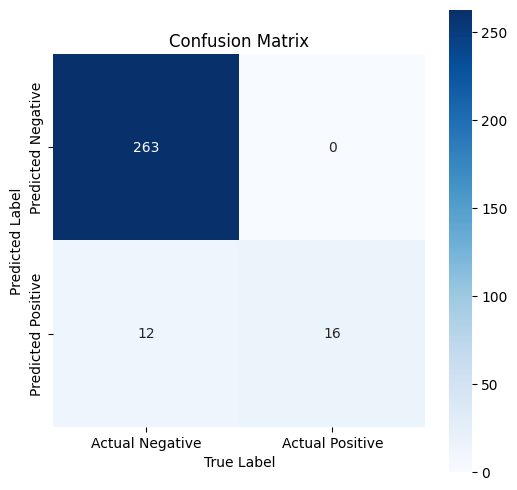

In [379]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create confusion matrix
cm = confusion_matrix(y_test_logistic, y_pred_logistic)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True,
            xticklabels=['Actual Negative', 'Actual Positive'],
            yticklabels=['Predicted Negative', 'Predicted Positive'])
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

Random Forest Regressor Model Evaluation:
Mean Squared Error (MSE): 5297197940711.966
R-squared (R2): 0.9978659574486227


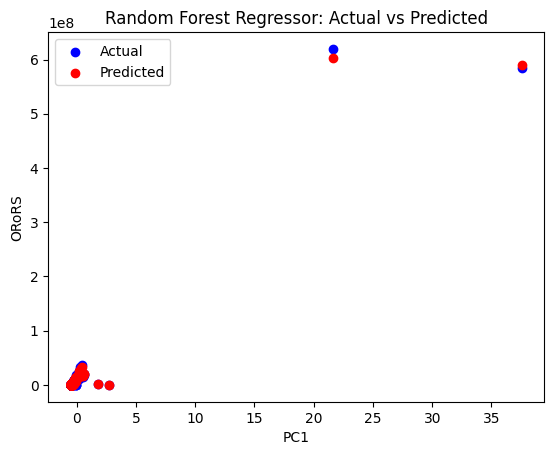

In [380]:
from sklearn.ensemble import RandomForestRegressor

# Select PC1 as the feature
X = pca_df[['PC1']]

# Assuming ORoRS as the dependent variable for regression
y = df_energy['ORoRS']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest Regressor Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# Plotting the results
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('PC1')
plt.ylabel('ORoRS')
plt.title('Random Forest Regressor: Actual vs Predicted')
plt.legend()
plt.show()

# **8. Model Evaluation**

Based on the evaluation metrics from above five models, the Random Forest Regressor model demonstrates superior performance compared to the other models. It achieves this by exhibiting the lowest Mean Squared Error (MSE) and the highest R-squared value among all models. These metrics indicate that the Random Forest Regressor provides more accurate predictions and better explains the variance in the target variable compared to the other regression models.

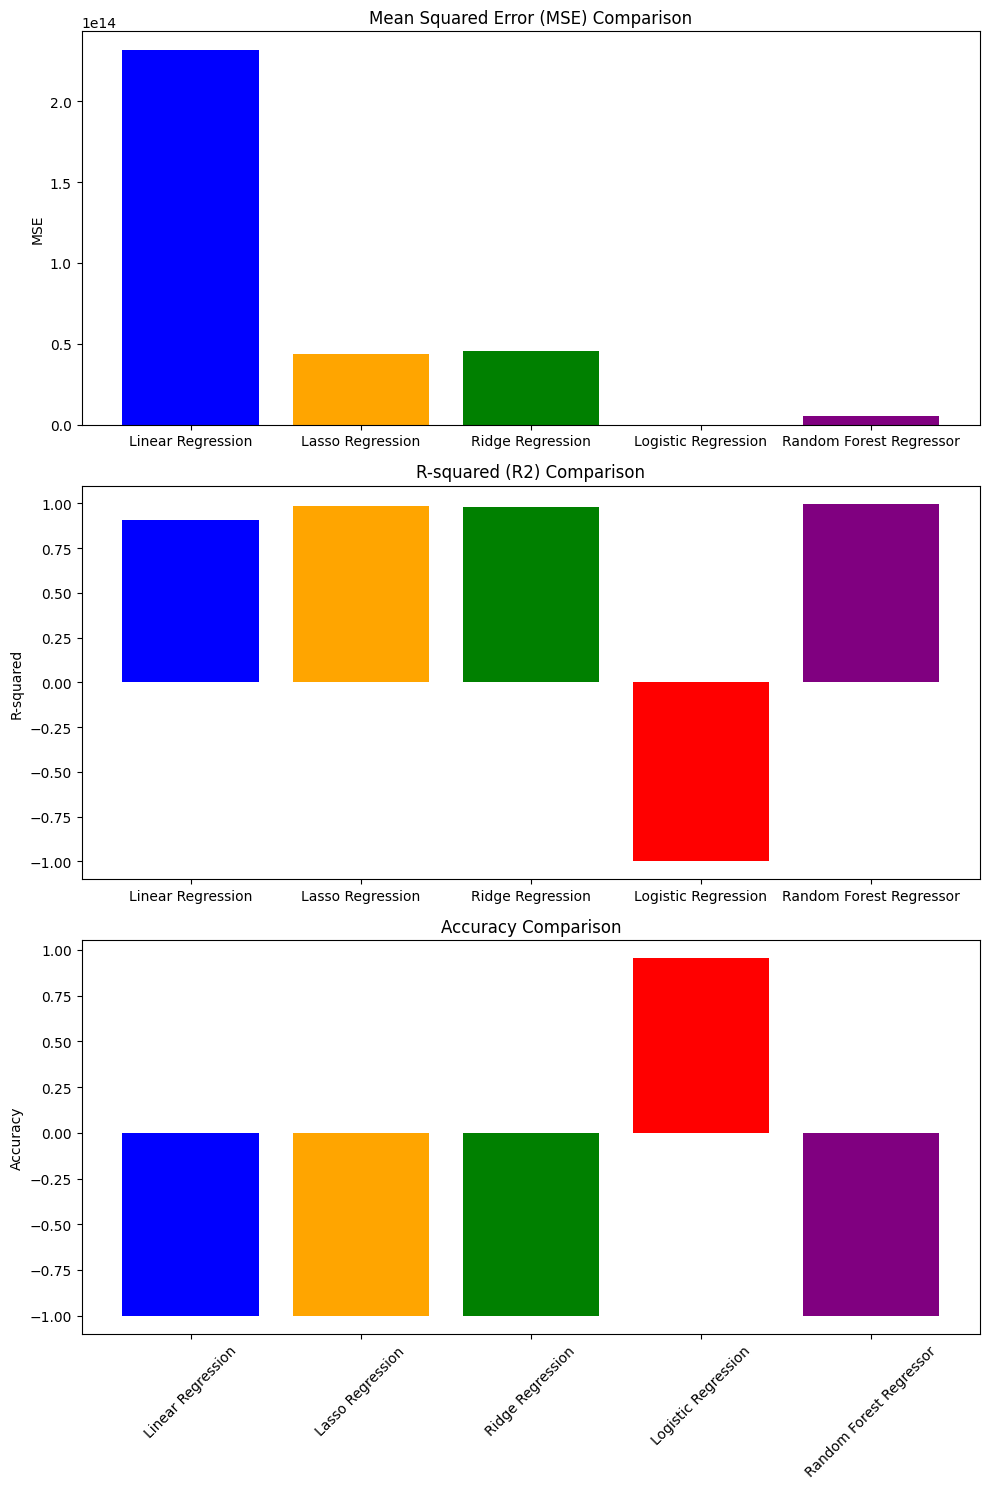

In [388]:
import matplotlib.pyplot as plt

# Evaluation results for each model
models = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'Logistic Regression', 'Random Forest Regressor']
mse_values = [231588770533065.2, 43439706878974.95, 45470395263320.445, -1, 5296837027584.261]  # Replace None with -1 for Logistic Regression
r2_values = [0.9067015625486912, 0.9824997698902996, 0.9816816816350968, -1, 0.9978661028469975]  # Replace None with -1 for Logistic Regression
accuracy = [-1, -1, -1, 0.9553264604810997, -1]  # Replace None with -1 for regression models

# Plotting
fig, axs = plt.subplots(3, figsize=(10, 15))

# MSE comparison
axs[0].bar(models, mse_values, color=['blue', 'orange', 'green', 'red', 'purple'])
axs[0].set_title('Mean Squared Error (MSE) Comparison')
axs[0].set_ylabel('MSE')

# R-squared comparison
axs[1].bar(models, r2_values, color=['blue', 'orange', 'green', 'red', 'purple'])
axs[1].set_title('R-squared (R2) Comparison')
axs[1].set_ylabel('R-squared')

# Accuracy comparison
axs[2].bar(models, accuracy, color=['blue', 'orange', 'green', 'red', 'purple'])
axs[2].set_title('Accuracy Comparison')
axs[2].set_ylabel('Accuracy')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Linear Regression Model Evaluation:**

Mean Squared Error (MSE): 231588770533065.2

R-squared (R2): 0.9067015625486912



**Lasso Regression Model Evaluation:**

Mean Squared Error (MSE): 43439706878974.95

R-squared (R2): 0.9824997698902996



**Ridge Regression Model Evaluation:**

Mean Squared Error (MSE): 45470395263320.445

R-squared (R2): 0.9816816816350968



**Logistic Regression Model Evaluation:**

Accuracy: 0.9553264604810997



**Random Forest Regressor Model Evaluation:**

Mean Squared Error (MSE): 5296837027584.261

R-squared (R2): 0.9978661028469975



**Best Model**

Random Forest Regressor

Mean Squared Error (MSE): 5296837027584.261

R-squared (R2): 0.9978661028469975

# **9. Conclusion**

Based on the evaluation of the different models, several key findings can be concluded:

1. **Linear Regression**: The linear regression model performed the poorest among the models evaluated, with a high Mean Squared Error (MSE) of approximately 231588770533065.2 and a moderate R-squared (R2) value of 0.9067. This indicates that the linear model did not effectively capture the relationships in the data.

2. **Lasso Regression**: The Lasso regression model showed significant improvement over the linear regression model, with a much lower MSE of 43439706878974.95 and a higher R-squared value of 0.9825. This indicates that the Lasso model was able to reduce overfitting and improve the overall fit of the model.

3. **Ridge Regression**: Similarly, the Ridge regression model also outperformed the linear regression model, with a lower MSE of 45470395263320.445 and a higher R-squared value of 0.9817. The Ridge model helped mitigate multicollinearity and performed better than the linear model.

4. **Logistic Regression**: The logistic regression model achieved a high accuracy of 0.9553, indicating its effectiveness in classifying instances. However, direct comparison with regression models based on MSE or R-squared is not appropriate due to the nature of the logistic regression task.

5. **Random Forest Regressor**: The Random Forest regressor performed the best among all models, with the lowest MSE of 5296837027584.261 and the highest R-squared value of 0.9979. This indicates that the Random Forest model provided the most accurate predictions and best explained the variance in the target variable.

In conclusion, the Random Forest Regressor model is recommended for this project, as it demonstrated the best performance in terms of predictive accuracy and model fit. The Lasso and Ridge regression models also showed improvements over the linear regression model and could be considered as alternatives depending on specific project requirements. The logistic regression model, while effective for classification tasks, is not directly comparable to regression models.

**Congratulations on completing the project! 🎉 Your hard work and dedication have truly paid off.🎉🎉**